In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [3]:
df=pd.read_csv('/content/02-14-2018 (1).xls')

In [4]:
df.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,14/02/2018 08:31:01,112641719,3,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,56320859.5,139.300036,56320958.0,56320761.0,Benign
1,0,0,14/02/2018 08:33:50,112641466,3,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,56320733.0,114.551299,56320814.0,56320652.0,Benign
2,0,0,14/02/2018 08:36:39,112638623,3,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,56319311.5,301.934596,56319525.0,56319098.0,Benign
3,22,6,14/02/2018 08:40:13,6453966,15,10,1239,2273,744,0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,Benign
4,22,6,14/02/2018 08:40:23,8804066,14,11,1143,2209,744,0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,Benign


In [5]:
df.tail()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
18931,21,6,14/02/2018 10:42:53,2,1,1,0,0,0,0,...,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,FTP-BruteForce
18932,21,6,14/02/2018 10:42:53,2,1,1,0,0,0,0,...,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,FTP-BruteForce
18933,21,6,14/02/2018 10:42:53,2,1,1,0,0,0,0,...,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,FTP-BruteForce
18934,21,6,14/02/2018 10:42:53,14,1,1,0,0,0,0,...,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,FTP-BruteForce
18935,21,6,14/02/2018 10:42:53,1,1,1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [7]:
df.isnull().sum()

,0
Dst Port,0
Protocol,0
Timestamp,0
Flow Duration,0
Tot Fwd Pkts,0
Tot Bwd Pkts,0
TotLen Fwd Pkts,0
TotLen Bwd Pkts,0
Fwd Pkt Len Max,0
Fwd Pkt Len Min,0


In [8]:
df.isna().sum()

,0
Dst Port,0
Protocol,0
Timestamp,0
Flow Duration,0
Tot Fwd Pkts,0
Tot Bwd Pkts,0
TotLen Fwd Pkts,0
TotLen Bwd Pkts,0
Fwd Pkt Len Max,0
Fwd Pkt Len Min,0


In [9]:
(df==-np.inf).sum()

,0
Dst Port,0
Protocol,0
Timestamp,0
Flow Duration,0
Tot Fwd Pkts,0
Tot Bwd Pkts,0
TotLen Fwd Pkts,0
TotLen Bwd Pkts,0
Fwd Pkt Len Max,0
Fwd Pkt Len Min,0


In [10]:
(df==np.inf).sum()

,0
Dst Port,0
Protocol,0
Timestamp,0
Flow Duration,0
Tot Fwd Pkts,0
Tot Bwd Pkts,0
TotLen Fwd Pkts,0
TotLen Bwd Pkts,0
Fwd Pkt Len Max,0
Fwd Pkt Len Min,0


In [11]:

df.describe()

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,18936.000000,18936.000000,1.893600e+04,18936.000000,18936.000000,18936.000000,18936.000000,18936.000000,18936.000000,18936.000000,18936.000000,18936.000000,18936.000000,18936.000000,18936.000000,1.893600e+04,1.893600e+04,1.893600e+04,1.893600e+04,1.893600e+04,1.893600e+04,1.893600e+04,1.893600e+04,1.893600e+04,1.893600e+04,1.893600e+04,1.893600e+04,1.893600e+04,1.893600e+04,1.893600e+04,18936.000000,18935.000000,18935.0,18935.0,18935.0,18935.000000,18935.000000,18935.000000,18935.000000,18935.000000,18935.000000,18935.000000,18935.000000,18935.000000,18935.0,18935.000000,18935.0,18935.000000,18935.000000,18935.0,18935.0,18935.0,18935.000000,18935.000000,18935.000000,18935.000000,18935.0,18935.0,18935.0,18935.0,18935.0,18935.0,18935.000000,18935.000000,18935.000000,18935.000000,18935.000000,18935.000000,18935.000000,18935.000000,1.893500e+04,18935.0,1.893500e+04,1.893500e+04,1.893500e+04,18935.000000,1.893500e+04,1.893500e+04
mean,22.640156,5.986798,2.994655e+05,1.024504,1.011935,1.661333,1.954373,0.755809,0.066751,0.217436,0.261058,1.360319,0.069497,0.436980,0.651292,2.086871e+02,1.175607e+06,1.460155e+05,7.190335e+02,1.504646e+05,1.457422e+05,2.991918e+05,1.461690e+05,7.800517e+02,1.502350e+05,1.457777e+05,7.352768e+03,5.394043e+02,1.047043e+03,4.790348e+03,2.086977,0.000158,0.0,0.0,0.0,40.410879,20.370742,587781.877690,587781.870242,0.063375,1.413626,0.281363,0.437044,88.378645,0.0,0.000158,0.0,0.997043,0.000158,0.0,0.0,0.0,0.995300,0.335716,0.217447,0.437003,0.0,0.0,0.0,0.0,0.0,0.0,1.024505,1.661421,1.011936,1.954476,26778.622181,0.527225,0.011777,39.868181,1.068066e+03,0.0,1.068066e+03,1.068066e+03,1.495066e+05,0.313539,1.495068e+05,1.495064e+05
std,125.426466,0.344307,5.750099e+06,0.785619,0.695730,71.097399,50.132793,18.063972,4.384549,7.166095,6.193096,28.922858,4.781315,9.083876,13.739651,1.414752e+04,6.419160e+05,2.861335e+06,3.638092e+04,2.890312e+06,2.861333e+06,5.749921e+06,2.861339e+06,4.635217e+04,2.890176e+06,2.861333e+06,5.622770e+05,1.785894e+04,5.332458e+04,4.100995e+05,207.166025,0.012587,0.0,0.0,0.0,17.127516,15.441514,320952.505210,320952.518849,4.359977,29.989895,6.886299,9.391075,2333.412363,0.0,0.012587,0.0,0.054304,0.012587,0.0,0.0,0.0,0.068399,8.842979,7.166284,9.084116,0.0,0.0,0.0,0.0,0.0,0.0,0.785640,71.099276,0.695748,50.134114,1599.477187,10.870056,0.731317,2.136058,1.344227e+05,0.0,1.344227e+05,1.344227e+05,2.890142e+06,9.212451,2.890146e+06,2.890137e+06
min,0.000000,0.000000,1.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,2.663301e-02,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.026633,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0

In [12]:
df['Label'].value_counts()

,count
Label,
FTP-BruteForce,18837
Benign,98


In [13]:
#df_sample=df.sample(frac=0.1,random_state=2)
#sb.histplot(df_sample['Flow Byts/s'])

In [14]:
np.isinf(df['Flow Byts/s']).sum()

np.int64(0)

In [15]:
np.isinf(df['Flow Pkts/s']).sum()

np.int64(0)

In [16]:
df.shape

(18936, 80)

In [17]:
df=df.replace([np.inf,-np.inf],np.nan)
df=df.dropna(subset=['Flow Byts/s'])

In [18]:
df=df.replace([np.inf,-np.inf],np.nan)
df=df.dropna(subset=['Flow Pkts/s'])

In [19]:
df.isna().sum()

,0
Dst Port,0
Protocol,0
Timestamp,0
Flow Duration,0
Tot Fwd Pkts,0
Tot Bwd Pkts,0
TotLen Fwd Pkts,0
TotLen Bwd Pkts,0
Fwd Pkt Len Max,0
Fwd Pkt Len Min,0


In [20]:
np.isinf(df['Flow Pkts/s']).sum()

np.int64(0)

In [21]:
np.isinf(df['Flow Byts/s']).sum()

np.int64(0)

till here we dropped all the nan and inf rows present in 2 columns 'Flow Pkts/s' and 'Flow Byts/s' thus now data is cleaned this will not create a problem since the instances are large


In [22]:
df['Flow Pkts/s'].shape

(18936,)

In [23]:
df.shape

(18936, 80)

In [24]:
df['Flow Pkts/s'].dtype

dtype('float64')

In [25]:
drop_cols=['Dst Port', 'Protocol', 'Timestamp', 'Fwd URG Flags', 'Bwd URG Flags',
             'CWE Flag Count', 'ECE Flag Cnt', 'Fwd Header Len', 'Bwd Header Len',
             'Fwd PSH Flags', 'Bwd PSH Flags', 'Init Fwd Win Byts', 'Init Bwd Win Byts',
             'Fwd Byts/b Avg', 'Bwd Byts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Blk Rate Avg']

In [26]:
# Clean column names in df
df.columns = df.columns.str.replace('\xa0', ' ').str.strip()

# Clean drop_cols
drop_cols = [col.replace('\xa0', ' ').strip() for col in drop_cols]

# Drop only existing columns
df = df.drop(columns=[col for col in drop_cols if col in df.columns], axis=1)


In [27]:
for v in df:
  print(df[v].dtype)

int64
int64
int64
int64
int64
int64
int64
float64
float64
int64
int64
float64
float64
float64
float64
float64
float64
int64
int64
int64
float64
float64
int64
int64
int64
float64
float64
int64
int64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
object


In [28]:
df.head()

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Pkts/b Avg,Bwd Pkts/b Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,112641719,3,0,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,0.026633,5.632086e+07,139.300036,56320958,56320761,112641719,5.632086e+07,139.300036,56320958,56320761,0,0.000000,0.000000,0,0,0.026633,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.000000,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56320859.5,139.300036,56320958.0,56320761.0,Benign
1,112641466,3,0,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,0.026633,5.632073e+07,114.551299,56320814,56320652,112641466,5.632073e+07,114.551299,56320814,56320652,0,0.000000,0.000000,0,0,0.026633,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.000000,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56320733.0,114.551299,56320814.0,56320652.0,Benign
2,112638623,3,0,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,0.026634,5.631931e+07,301.934596,56319525,56319098,112638623,5.631931e+07,301.934596,56319525,56319098,0,0.000000,0.000000,0,0,0.026634,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.000000,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56319311.5,301.934596,56319525.0,56319098.0,Benign
3,6453966,15,10,1239,2273,744,0,82.600000,196.741237,976,0,227.300000,371.677892,544.161528,3.873587,2.689152e+05,247443.778966,673900,22,6453966,4.609976e+05,123109.423588,673900,229740,5637902,626433.555556,455082.214224,1167293,554,2.324152,1.549435,0.0,976.0,135.076923,277.834760,77192.153846,0.0,0.0,0.0,1.0,0.0,0.0,0.0,140.48,82.600000,227.300000,0.0,0.0,15.0,1239.0,10.0,2273.0,6.0,32.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,Benign
4,8804066,14,11,1143,2209,744,0,81.642857,203.745545,976,0,200.818182,362.249864,380.733175,2.839597,3.668361e+05,511356.609733,1928102,21,8804066,6.772358e+05,532416.970959,1928102,246924,7715481,771548.100000,755543.082717,2174893,90,1.590174,1.249423,0.0,976.0,128.923077,279.763032,78267.353846,0.0,0.0,0.0,1.0,0.0,0.0,0.0,134.08,81.642857,200.818182,0.0,0.0,14.0,1143.0,11.0,2209.0,6.0,32.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,Benign


In [29]:
target=df['Label']

In [30]:
# Convert "Benign" to 0 and all attacks to 1
target = target.apply(lambda x: 0 if x == "Benign" else 1)


In [31]:
target.head()

,Label
0,0
1,0
2,0
3,0
4,0


In [32]:
target.tail()

,Label
18931,1
18932,1
18933,1
18934,1
18935,1


In [33]:
df['Label'].value_counts()

,count
Label,
FTP-BruteForce,18837
Benign,98


In [34]:
df=df.drop(columns='Label',axis=1)

In [35]:
scaler=MinMaxScaler()

In [36]:
df[df.columns]=scaler.fit_transform(df[df.columns])

In [ ]:
#[df.columns] return dataframe index we can also do it like df[[col]] this is because minmaxscaler expects 2d array notb 1d

In [37]:
df.head()

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Pkts/b Avg,Bwd Pkts/b Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,0.999996,0.022222,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,5.415000e-14,0.999996,0.000034,0.999988,1.000000e+00,0.999996,0.999996,0.000025,0.999988,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.083000e-13,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.022222,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.999996,0.179581,0.999988,1.000000
1,0.999994,0.022222,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,8.405000e-14,0.999994,0.000028,0.999985,9.999981e-01,0.999994,0.999994,0.000020,0.999985,0.999998,0.000000,0.000000,0.000000,0.000000,0.000000,1.681000e-13,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.022222,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.999994,0.147675,0.999985,0.999998
2,0.999968,0.022222,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,4.201500e-13,0.999968,0.000075,0.999963,9.999705e-01,0.999968,0.999968,0.000054,0.999963,0.999970,0.000000,0.000000,0.000000,0.000000,0.000000,8.403000e-13,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.022222,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.999968,0.389243,0.999963,0.999970
3,0.057296,0.155556,0.120482,0.161328,0.987402,0.636986,0.0,0.118406,0.434388,1.0,0.0,0.690881,0.771829,0.000503,1.923477e-06,0.004775,0.061180,0.011965,3.728643e-07,0.057296,0.008185,0.021977,0.011965,0.004079,0.077711,0.370463,0.077682,0.021970,0.019508,2.297519e-06,0.000002,0.0,0.835616,0.303482,0.631395,0.398660,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.286928,0.118406,0.690881,0.0,0.0,0.155556,0.161328,0.120482,0.987402,0.066667,0.8,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
4,0.078160,0.144444,0.132530,0.148828,0.959600,0.636986,0.0,0.117034,0.449853,1.0,0.0,0.610390,0.752251,0.000352,1.406482e-06,0.006513,0.126432,0.034234,3.551088e-07,0.078160,0.012025,0.095044,0.034234,0.004384,0.106347,0.456282,0.128970,0.040934,0.003169,1.563541e-06,0.000001,0.0,0.835616,0.289656,0.635777,0.404213,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.273856,0.117034,0.610390,0.0,0.0,0.144444,0.148828,0.132530,0.959600,0.066667,0.8,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000


In [38]:
type(df)

pandas.core.frame.DataFrame

to create timesteps i.e. to create sequencesof data


In [39]:
def seq(data,s):
  seq_list=[]
  for i in range(len(data)-s):
    s1=df[i:i+s]
    seq_list.append(s1)
  return np.array(seq_list)

#we are creating a 10 timestamp sequences

In [40]:
import numpy as np

# Create sequences using NumPy strides (from your code)
def create_sequences_with_labels(data, labels, seq_length):
    num_samples = len(data) - seq_length + 1

    # Create input sequences
    shape = (num_samples, seq_length, data.shape[1])
    strides = (data.strides[0], data.strides[0], data.strides[1])
    sequences = np.lib.stride_tricks.as_strided(data, shape=shape, strides=strides)

    # Align labels — take the label at the last timestep of each sequence
    seq_labels = labels[seq_length - 1:]

    return sequences, seq_labels

# Generate sequences and labels (5 timesteps)
sequence_length = 5
sequences, seq_labels = create_sequences_with_labels(df.values, target.values, sequence_length)

print("Sequences shape:", sequences.shape)  # (num_samples, seq_length, features)
print("Labels shape:", seq_labels.shape)     # (num_samples,)


Sequences shape: (18932, 5, 62)
Labels shape: (18932,)


data.strides() return number of bytes to move in row(eg 4int bytes*3noof cols =12 bytes),no of bytes to move in col

In [41]:
import numpy as np
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

# Step 1: Flatten sequences for undersampling
num_samples, seq_length, num_features = sequences.shape
sequences_flat = sequences.reshape(num_samples, -1)  # Convert to 2D for resampling num_samples,seaq_length*numfeatures

# Step 2: Apply undersampling
rus = RandomUnderSampler(sampling_strategy='auto', random_state=42) #removes samples from majority class to autio(auomaically) match minorirty class
sequences_resampled, seq_labels_resampled = rus.fit_resample(sequences_flat, seq_labels)

# Step 3: Reshape back to LSTM format
sequences_resampled = sequences_resampled.reshape(-1, seq_length, num_features) #-1 automatically allows np to infer new no of undersampled data

# Step 4: Train-test split (80-20)
x_train, x_test, y_train_seq, y_test_seq = train_test_split(
    sequences_resampled, seq_labels_resampled, test_size=0.2, random_state=42, stratify=seq_labels_resampled #to prevent imbalanced class distribution in test dataa
)

# Print class distribution after undersampling
print("Original class distribution:", Counter(seq_labels))
print("Resampled class distribution:", Counter(y_train_seq))

# Print shapes after processing
print("x_train shape:", x_train.shape)  # (num_train_samples, seq_length, features)
print("y_train shape:", y_train_seq.shape)  # (num_train_samples,)
print("x_test shape:", x_test.shape)  # (num_test_samples, seq_length, features)
print("y_test shape:", y_test_seq.shape)  # (num_test_samples,)


Original class distribution: Counter({np.int64(1): 18838, np.int64(0): 94})
Resampled class distribution: Counter({np.int64(1): 75, np.int64(0): 75})
x_train shape: (150, 5, 62)
y_train shape: (150,)
x_test shape: (38, 5, 62)
y_test shape: (38,)


In [42]:
'''# 80-20 train-test split
train_size = int(0.8 * len(sequences))

# Split sequences
x_train = sequences[:train_size]
x_test = sequences[train_size:]

# Split labels (last timestep's label for each sequence)
y_train_seq = seq_labels[:train_size]
y_test_seq = seq_labels[train_size:]

print("x_train shape:", x_train.shape)  # (num_train_samples, seq_length, features)
print("y_train shape:", y_train_seq.shape)  # (num_train_samples,)
print("x_test shape:", x_test.shape)  # (num_test_samples, seq_length, features)
print("y_test shape:", y_test_seq.shape)  # (num_test_samples,)
'''

'# 80-20 train-test split\ntrain_size = int(0.8 * len(sequences))\n\n# Split sequences\nx_train = sequences[:train_size]\nx_test = sequences[train_size:]\n\n# Split labels (last timestep\'s label for each sequence)\ny_train_seq = seq_labels[:train_size]\ny_test_seq = seq_labels[train_size:]\n\nprint("x_train shape:", x_train.shape)  # (num_train_samples, seq_length, features)\nprint("y_train shape:", y_train_seq.shape)  # (num_train_samples,)\nprint("x_test shape:", x_test.shape)  # (num_test_samples, seq_length, features)\nprint("y_test shape:", y_test_seq.shape)  # (num_test_samples,)\n'

In [43]:
pip install tensorflow --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 121.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 112.8 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.18.0
    Uninstalling tensorflow-2.18.0:
      Successfully uninstalled tensorflow-2.18.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.11.0 requires tensorflow==2.18.0, but you have te

In [44]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

NameError: name 'xtrain' is not defined

In [45]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Input, Dense, LSTM, Conv1D, MaxPooling1D, Flatten,
                                     RepeatVector, TimeDistributed, Dropout, BatchNormalization,
                                     Bidirectional, Multiply, Lambda)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import tensorflow.keras.backend as K

# --------------------- Hyperparameters ---------------------
input_dimensions = x_train.shape[2]  # Number of features
timesteps = x_train.shape[1]

# --------------------- Attention Layer ---------------------
def attention_block(inputs):
    attention_scores = Dense(128, activation="tanh")(inputs)
    attention_scores = Dense(1, activation="softmax")(attention_scores)
    attention_scores = Lambda(lambda x: K.squeeze(x, axis=-1))(attention_scores)
    attention_scores = Lambda(lambda x: K.expand_dims(x, axis=-1))(attention_scores)

    context_vector = Multiply()([inputs, attention_scores])
    context_vector = Lambda(lambda x: K.sum(x, axis=1))(context_vector)

    return context_vector

# --------------------- Model Architecture ---------------------
inputs = Input(shape=(timesteps, input_dimensions))

# 1D Convolutional Feature Extraction
conv1 = Conv1D(filters=64, kernel_size=3, padding='same', activation='relu')(inputs)
conv1 = BatchNormalization()(conv1)
conv1 = MaxPooling1D(pool_size=2)(conv1)

# Encoding with BiLSTM
encode = Bidirectional(LSTM(512, return_sequences=True, kernel_regularizer=l2(0.001)))(conv1)
encode = Dropout(0.3)(encode)
encode = Bidirectional(LSTM(128, return_sequences=True))(encode)
encode = attention_block(encode)  # ✅ Fixed Attention Block
encode = Dense(128, activation='relu')(encode)

# Decoding with LSTM
decode = RepeatVector(timesteps)(encode)
decode = LSTM(256, return_sequences=True)(decode)
decode = Dropout(0.3)(decode)
decode = LSTM(128, return_sequences=True)(decode)
decode = BatchNormalization()(decode)

# Output Layer
outputs = TimeDistributed(Dense(input_dimensions, activation='sigmoid'))(decode)

# --------------------- Build Model ---------------------
model = Model(inputs, outputs)

# Optimizer with Learning Rate Warmup
optimizer = Adam(learning_rate=0.0005, beta_1=0.9, beta_2=0.999)

# Compile Model
model.compile(optimizer=optimizer, loss='mae', metrics=['accuracy'])

# Summary
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 5, 62)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 5, 64)     │     11,968 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 5, 64)     │        256 │ conv1d[0][0]      │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d       │ (None, 2, 64)     │          0 │ batch_normalizat… │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional       │ (None, 2, 1024)   │  2,363,392 │ max_pooling1d[0]… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 2, 1024)   │          0 │ bidirectional[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_1     │ (None, 2, 256)    │  1,180,672 │ dropout[0][0]     │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 2, 128)    │     32,896 │ bidirectional_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 2, 1)      │        129 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda (Lambda)     │ (None, 2)         │          0 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_1 (Lambda)   │ (None, 2, 1)      │          0 │ lambda[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply (Multiply) │ (None, 2, 256)    │          0 │ bidirectional_1[… │
│                     │                   │            │ lambda_1[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_2 (Lambda)   │ (None, 256)       │          0 │ multiply[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 128)       │     32,896 │ lambda_2[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ repeat_vector       │ (None, 5, 128)    │          0 │ dense_2[0][0]     │
│ (RepeatVector)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_2 (LSTM)       │ (None, 5, 256)    │    394,240 │ repeat_vector[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 5, 256)    │          0 │ lstm_2[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_3 (LSTM)       │ (None, 5, 128)    │    197,120 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 5, 128)    │        512 │ lstm_3[0][0]      │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ time_distributed    │ (None, 5, 62)     │      7,998 │ batch_normalizat… │
│ (TimeDistributed)   │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴─────────────────

 Total params: 4,222,079 (16.11 MB)

 Trainable params: 4,221,695 (16.10 MB)

 Non-trainable params: 384 (1.50 KB)

In [46]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=5,          # Stop if no improvement after 5 epochs
    restore_best_weights=True  # Restore model to best validation loss
)
history=model.fit(
    x_train,x_train,
    epochs=10,
    batch_size=128,
    validation_data=(x_test,x_test)
)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 2, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 12s 968ms/step - accuracy: 0.0208 - loss: 0.7194 - val_accuracy: 0.0000e+00 - val_loss: 0.7090
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.1552 - loss: 0.6849 - val_accuracy: 0.0000e+00 - val_loss: 0.6973
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.1631 - loss: 0.6533 - val_accuracy: 0.0000e+00 - val_loss: 0.6859
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.1097 - loss: 0.6268 - val_accuracy: 0.0000e+00 - val_loss: 0.6749
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 0.0210 - loss: 0.6039 - val_accuracy: 0.0737 - val_loss: 0.6644
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.0042 - loss: 0.5839 - val_accuracy: 0.1000 - val_loss: 0.6546
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.0136 - loss: 0.5648 - val_accuracy: 0.0947 - val_loss: 0.6455
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.0164 - loss: 0.5487 - val_accuracy: 0.0947 - val_lo

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Define Early Stopping
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=5,          # Stop if no improvement after 5 epochs
    restore_best_weights=True  # Restore model to best validation loss
)

# Train Model with Early Stopping
history = model.fit(
    x_train, x_train,
    epochs=10,
    batch_size=128,
    validation_data=(x_test, x_test),
    callbacks=[early_stopping]  # Add callback here
)


In autoencoders — especially LSTM autoencoders — the goal is to learn to reconstruct the input rather than predict labels like in traditional models.if the reconstructoin error is larger then it is considered anomaly then it checks with ytest and we can make confusion matrix

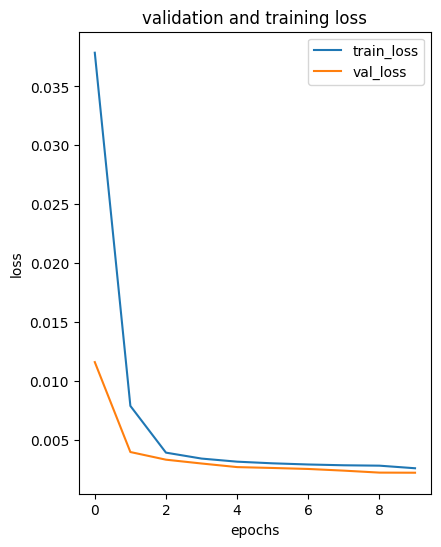

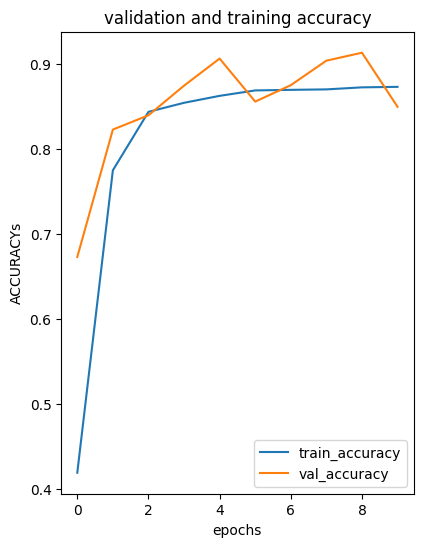

In [ ]:
train_loss=history.history['loss']
val_loss=history.history['val_loss']
train_acc=history.history['accuracy']
val_accuracy=history.history['val_accuracy']

plt.figure(figsize=(10,6))
plt.subplot(1,2,1) #row,col,index
plt.plot(train_loss,label='train_loss')
plt.plot(val_loss,label='val_loss')
plt.title('validation and training loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()


plt.figure(figsize=(10,6))
plt.subplot(1,2,1) #row,col,index
plt.plot(train_acc,label='train_accuracy')
plt.plot(val_accuracy,label='val_accuracy')
plt.title('validation and training accuracy')
plt.xlabel('epochs')
plt.ylabel('ACCURACYs')
plt.legend()

plt.show()

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# Convert df to NumPy array if not already
X = df.values  # Features
y = target.values  # Labels

# Train-test split (80-20)
x_train, x_test, y_train_seq, y_test_seq = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y  # Stratify to maintain class balance
)

# Print shapes
print("Training Data Shape:", x_train.shape)  # (num_samples, features)
print("Training Labels Shape:", y_train_seq.shape)
print("Testing Data Shape:", x_test.shape)
print("Testing Labels Shape:", y_test_seq.shape)


Training Data Shape: (835800, 62)
Training Labels Shape: (835800,)
Testing Data Shape: (208951, 62)
Testing Labels Shape: (208951,)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np

# Extract benign samples for pretraining
x_benign = x_train[y_train_seq == 0]  # Assuming '0' is benign class
y_benign = y_train_seq[y_train_seq == 0]

# Create sequences using NumPy strides
def create_sequences_with_labels(data, labels, seq_length):
    num_samples = len(data) - seq_length + 1

    # Create input sequences
    shape = (num_samples, seq_length, data.shape[1])
    strides = (data.strides[0], data.strides[0], data.strides[1])
    sequences = np.lib.stride_tricks.as_strided(data, shape=shape, strides=strides)

    # Align labels — take the label at the last timestep of each sequence
    seq_labels = labels[seq_length - 1:]

    return sequences, seq_labels

# Generate sequences and labels (5 timesteps)
sequence_length = 10
sequences, seq_labels = create_sequences_with_labels(x_benign, y_benign, sequence_length)

print("Sequences shape:", sequences.shape)  # (num_samples, seq_length, features)
print("Labels shape:", seq_labels.shape)     # (num_samples,)

# Check shapes (Fixed)
print("Benign training data shape:", x_benign.shape)
print("Benign labels shape:", y_benign.shape)

# Define Pretrained Model
seq_length = sequence_length  # Ensure seq_length is correctly used
num_features = x_benign.shape[1]

pretrained_model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(seq_length, num_features)),
    LSTM(32),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification (Normal vs Attack)
])

pretrained_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train on Benign Traffic Only (Fixed)
pretrained_model.fit(sequences, seq_labels, epochs=5, validation_data=(x_test, y_test_seq))

# Save model
pretrained_model.save('pretrained_lstm.h5')


Sequences shape: (531037, 10, 62)
Labels shape: (531037,)
Benign training data shape: (531046, 62)
Benign labels shape: (531046,)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
11352/16595 ━━━━━━━━━━━━━━━━━━━━ 36s 7ms/step - accuracy: 0.9991 - loss: 0.0053

KeyboardInterrupt: 

In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Encoder
input_dim = x_benign.shape[1]  # Number of features
encoding_dim = 16

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Train Only on Benign Data
autoencoder.fit(x_benign, x_benign, epochs=10, batch_size=32, validation_data=(x_test, x_test))
autoencoder.save('pretrained_autoencoder.h5')


Epoch 1/10
16596/16596 ━━━━━━━━━━━━━━━━━━━━ 52s 3ms/step - loss: 0.0079 - val_loss: 6.8372e-04
Epoch 2/10
  394/16596 ━━━━━━━━━━━━━━━━━━━━ 33s 2ms/step - loss: 6.1853e-05

KeyboardInterrupt: 

In [ ]:
# Load Pretrained Autoencoder
autoencoder = load_model('pretrained_autoencoder.h5')

# Compute Reconstruction Error
reconstruction = autoencoder.predict(x_test)
mse = np.mean(np.power(x_test - reconstruction, 2), axis=1)

# Set Threshold (95th percentile)
threshold = np.percentile(mse, 95)

# Detect Anomalies
y_pred = (mse > threshold).astype(int)  # 1 = Attack, 0 = Normal


In [ ]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(iterations=500, learning_rate=0.05, depth=6)
model.fit(x_train_2017, y_train_2017, eval_set=(x_test_2017, y_test_2017), verbose=100)
model.save_model("pretrained_catboost.cbm")


In [ ]:
model = CatBoostClassifier()
model.load_model("pretrained_catboost.cbm")

# Continue Training on CICIDS 2018
model.fit(x_train_2018, y_train_2018, eval_set=(x_test_2018, y_test_2018), verbose=100)
